In [1]:
import numpy as np
import matplotlib.pyplot as pl
%matplotlib inline

In [69]:
from astropy.table import Table
filename = 'ganymede/Kepler-22b.fits'
data = Table.read(filename)
flux = np.array([data.columns[i] for i in range(len(data.columns)-1)], dtype='float64')
t = np.array(data.columns[-1], dtype='float64')
ll, t0 = np.loadtxt('ganymede/xi2_Kepler-22b_gan_maxvar.txt').T

In [70]:
import exoplanet as xo
orbit = xo.orbits.SimpleTransitOrbit(period=5*60*60, duration=6.977)
u = [0.3, 0.2]
planet = (
    xo.LimbDarkLightCurve(u)
    .get_light_curve(orbit=orbit, r=0.0203, t=t/(60*60) - 10, texp=np.mean(np.diff(t))/(60*60))
    .eval()
).T[0]
moon = (
    xo.LimbDarkLightCurve(u)
    .get_light_curve(orbit=orbit, r=0.00378 , t=t/(60*60) - 5, texp=np.mean(np.diff(t))/(60*60))
    .eval()
).T[0]

['/usr/local/lib/python3.8/site-packages/exoplanet/theano_ops/lib/include', '/usr/local/lib/python3.8/site-packages/exoplanet/theano_ops/lib/vendor/eigen-3.3.7']
['/usr/local/lib/python3.8/site-packages/exoplanet/theano_ops/lib/include', '/usr/local/lib/python3.8/site-packages/exoplanet/theano_ops/lib/vendor/eigen-3.3.7']
['/usr/local/lib/python3.8/site-packages/exoplanet/theano_ops/lib/include', '/usr/local/lib/python3.8/site-packages/exoplanet/theano_ops/lib/vendor/eigen-3.3.7']
['/usr/local/lib/python3.8/site-packages/exoplanet/theano_ops/lib/include', '/usr/local/lib/python3.8/site-packages/exoplanet/theano_ops/lib/vendor/eigen-3.3.7']


In [77]:
monoflux = np.sum(flux, axis=0)
bins = np.linspace(0, 20, 100)
binned = np.histogram(t/(60*60), bins, weights=monoflux, density=True)[0] / np.histogram(t/(60*60), bins)[0]

binned_resids = np.histogram(t/(60*60), bins, weights=(monoflux-planet*np.mean(monoflux)), density=True)[0] / np.histogram(t/(60*60), bins)[0]

In [78]:
yerr = np.std(monoflux/np.mean(monoflux) - planet - moon)
yerr /= np.sqrt(len(t)/len(bins))

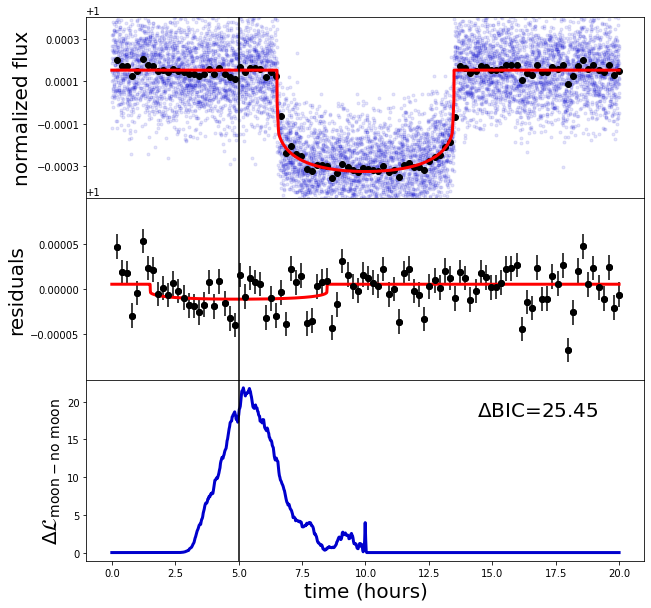

In [97]:
fig, axs = pl.subplots(3, 1, figsize=(10, 10), sharex=True)
pl.subplots_adjust(hspace=0)
axs[0].plot(t/(60*60), monoflux / np.mean(monoflux), '.', alpha=0.1, color='mediumblue')
axs[0].plot(bins[:-1] + np.diff(bins), binned/np.mean(binned), 'ko')
axs[0].plot(t/(60*60), planet+1-np.mean(planet), color='red', linewidth=3)
axs[1].plot(bins[:-1] + np.diff(bins), binned_resids/np.mean(binned_resids), 'ko')
axs[1].errorbar(bins[:-1] + np.diff(bins), binned_resids/np.mean(binned_resids), yerr=np.ones_like(binned_resids)*yerr, fmt='ko')
axs[1].plot(t/(60*60), moon+1-np.mean(moon), color='red', linewidth=3)
axs[1].set_ylim(1-0.0001, 1.0001)
axs[2].plot(t0, ll, '-', linewidth=3, color='mediumblue')
axs[0].axvline(5, color='k')
axs[1].axvline(5, color='k')
axs[2].axvline(5, color='k')
dbic = np.max(2*ll - 2*np.log(len(t)))
axs[0].set_ylim(0.99955, 1.0004)

axs[0].set_yticks(axs[0].get_yticks()[::2][1:]);
axs[1].set_yticks(axs[1].get_yticks()[::2][1:-1]);

axs[2].set_xlabel("time (hours)", fontsize=20)
axs[0].set_ylabel("normalized flux", fontsize=20)
axs[1].set_ylabel("residuals", fontsize=20)
axs[2].set_ylabel(r"$\Delta\mathcal{L}_\mathrm{moon-no\ moon}$", fontsize=20)

axs[2].annotate(r"$\Delta$BIC={0:0.2f}".format(dbic), xy=(0.7, 0.8), xycoords='axes fraction', fontsize=20)
pl.savefig("/Users/tgordon/Desktop/Kepler22_ganymede.pdf")

['/usr/local/lib/python3.8/site-packages/exoplanet/theano_ops/lib/include', '/usr/local/lib/python3.8/site-packages/exoplanet/theano_ops/lib/vendor/eigen-3.3.7']
['/usr/local/lib/python3.8/site-packages/exoplanet/theano_ops/lib/include', '/usr/local/lib/python3.8/site-packages/exoplanet/theano_ops/lib/vendor/eigen-3.3.7']
['/usr/local/lib/python3.8/site-packages/exoplanet/theano_ops/lib/include', '/usr/local/lib/python3.8/site-packages/exoplanet/theano_ops/lib/vendor/eigen-3.3.7']
['/usr/local/lib/python3.8/site-packages/exoplanet/theano_ops/lib/include', '/usr/local/lib/python3.8/site-packages/exoplanet/theano_ops/lib/vendor/eigen-3.3.7']


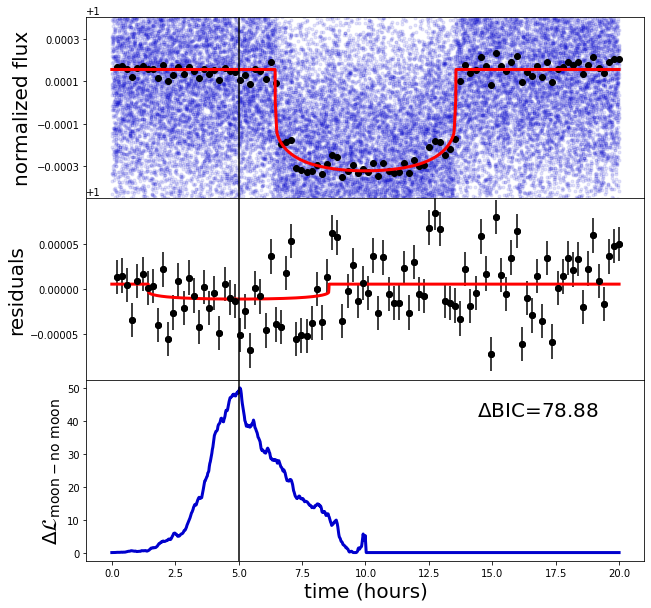

In [104]:
filename = 'mars/Kepler-62e.fits'
data = Table.read(filename)
flux = np.array([data.columns[i] for i in range(len(data.columns)-1)], dtype='float64')
t = np.array(data.columns[-1], dtype='float64')
ll, t0 = np.loadtxt('mars/xi2_Kepler-62e_mars_maxvar.txt').T

import exoplanet as xo
orbit = xo.orbits.SimpleTransitOrbit(period=5*60*60, duration=7.123)
u = [0.3, 0.2]
planet = (
    xo.LimbDarkLightCurve(u)
    .get_light_curve(orbit=orbit, r=0.0203, t=t/(60*60) - 10, texp=np.mean(np.diff(t))/(60*60))
    .eval()
).T[0]
moon = (
    xo.LimbDarkLightCurve(u)
    .get_light_curve(orbit=orbit, r=0.00378 , t=t/(60*60) - 5, texp=np.mean(np.diff(t))/(60*60))
    .eval()
).T[0]

monoflux = np.sum(flux, axis=0)
bins = np.linspace(0, 20, 100)
binned = np.histogram(t/(60*60), bins, weights=monoflux, density=True)[0] / np.histogram(t/(60*60), bins)[0]
binned_resids = np.histogram(t/(60*60), bins, weights=(monoflux-planet*np.mean(monoflux)), density=True)[0] / np.histogram(t/(60*60), bins)[0]

yerr = np.std(monoflux/np.mean(monoflux) - planet - moon)
yerr /= np.sqrt(len(t)/len(bins))

fig, axs = pl.subplots(3, 1, figsize=(10, 10), sharex=True)
pl.subplots_adjust(hspace=0)
axs[0].plot(t/(60*60), monoflux / np.mean(monoflux), '.', alpha=0.1, color='mediumblue')
axs[0].plot(bins[:-1] + np.diff(bins), binned/np.mean(binned), 'ko')
axs[0].plot(t/(60*60), planet+1-np.mean(planet), color='red', linewidth=3)
axs[1].plot(bins[:-1] + np.diff(bins), binned_resids/np.mean(binned_resids), 'ko')
axs[1].errorbar(bins[:-1] + np.diff(bins), binned_resids/np.mean(binned_resids), yerr=np.ones_like(binned_resids)*yerr, fmt='ko')
axs[1].plot(t/(60*60), moon+1-np.mean(moon), color='red', linewidth=3)
axs[1].set_ylim(1-0.0001, 1.0001)
axs[2].plot(t0, ll, '-', linewidth=3, color='mediumblue')
axs[0].axvline(5, color='k')
axs[1].axvline(5, color='k')
axs[2].axvline(5, color='k')
dbic = np.max(2*ll - 2*np.log(len(t)))
axs[0].set_ylim(0.99955, 1.0004)

axs[0].set_yticks(axs[0].get_yticks()[::2][1:]);
axs[1].set_yticks(axs[1].get_yticks()[::2][1:-1]);

axs[2].set_xlabel("time (hours)", fontsize=20)
axs[0].set_ylabel("normalized flux", fontsize=20)
axs[1].set_ylabel("residuals", fontsize=20)
axs[2].set_ylabel(r"$\Delta\mathcal{L}_\mathrm{moon-no\ moon}$", fontsize=20)

axs[2].annotate(r"$\Delta$BIC={0:0.2f}".format(dbic), xy=(0.7, 0.8), xycoords='axes fraction', fontsize=20)
pl.savefig("/Users/tgordon/Desktop/Kepler62_mars.pdf")

63.27430582828485


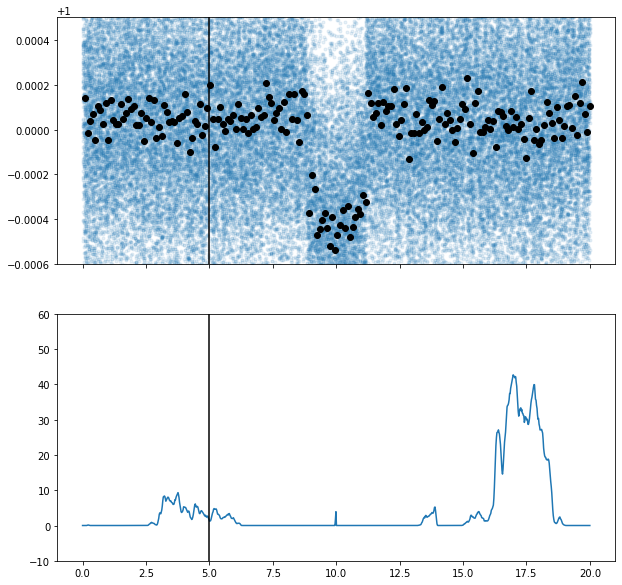

In [105]:
filename = 'mars/Kepler-1540b.fits'
data = Table.read(filename)
flux = np.array([data.columns[i] for i in range(len(data.columns)-1)], dtype='float64')
t = np.array(data.columns[-1], dtype='float64')
ll, t0 = np.loadtxt('mars/xi2_Kepler-1540b_mars_maxvar.txt').T

monoflux = np.sum(flux, axis=0)
bins = np.linspace(0, 20, 200)
binned = np.histogram(t/(60*60), bins, weights=monoflux, density=True)[0] / np.histogram(t/(60*60), bins)[0]

fig, axs = pl.subplots(2, 1, figsize=(10, 10), sharex=True)
axs[0].plot(t/(60*60), monoflux / np.mean(monoflux), '.', alpha=0.1)
axs[0].plot(bins[:-1] + np.diff(bins), binned/np.mean(binned), 'ko')
axs[1].plot(t0, ll, '-')
axs[0].axvline(5, color='k')
axs[1].axvline(5, color='k')
axs[0].set_ylim(0.9994, 1.0005)
axs[1].set_ylim(-10, 60)
print(np.max(2*ll - 2*np.log(len(t))))

In [229]:
1 - (0.005**2)

0.999975